# Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

#remove warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#finding the number of rows and columns of the data.
data.shape

(1338, 7)

# Details of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

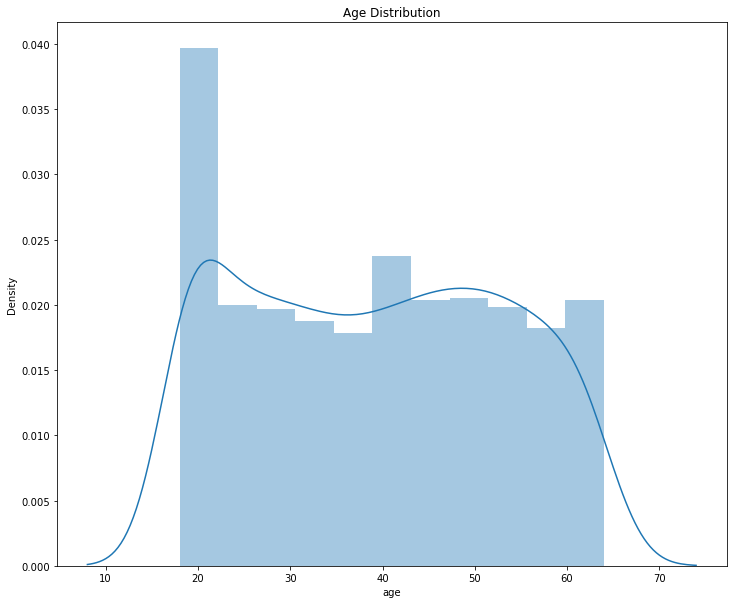

In [6]:
plt.figure(figsize = (12, 10))
sns.distplot(data['age'])
plt.title("Age Distribution")

Text(0.5, 1.0, 'Bmi Distribution')

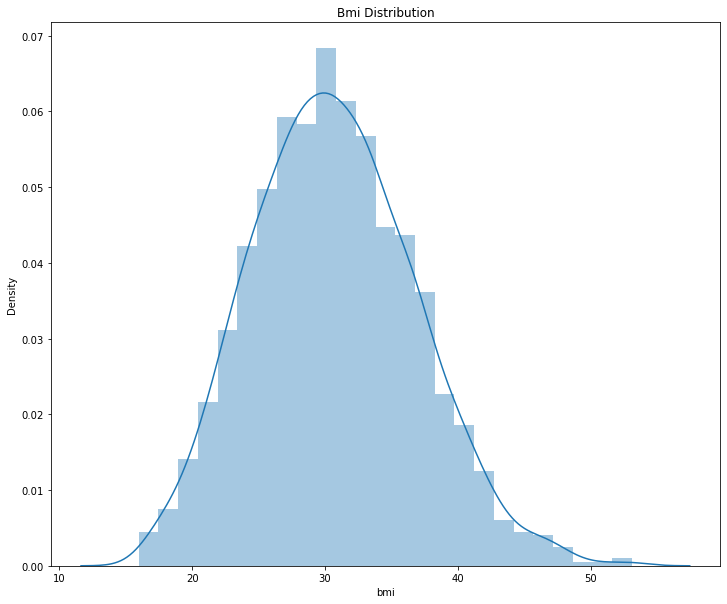

In [7]:
plt.figure(figsize = (12, 10))
sns.distplot(data['bmi'])
plt.title("Bmi Distribution")

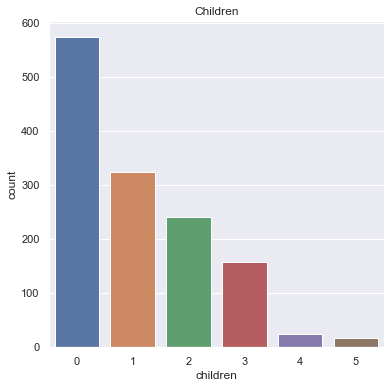

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['children'])
plt.title('Children')
plt.show()

Text(0.5, 1.0, 'Charges Distribution')

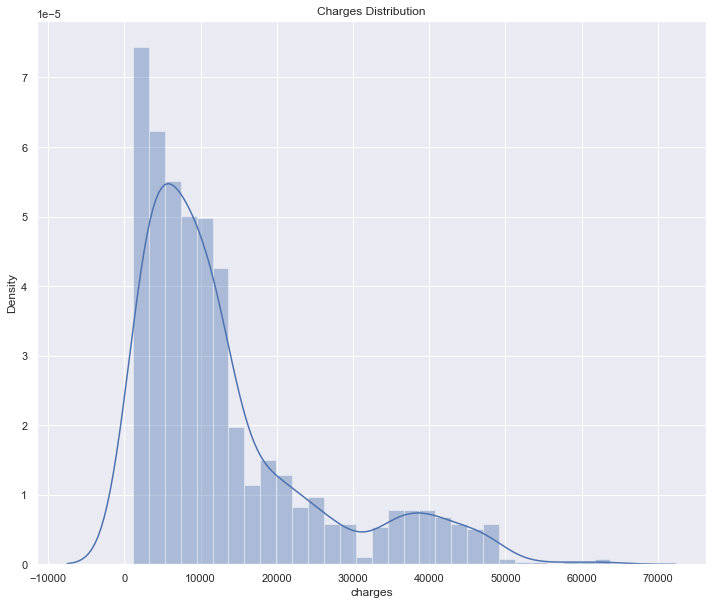

In [9]:

plt.figure(figsize = (12, 10))
sns.distplot(data['charges'])
plt.title("Charges Distribution")

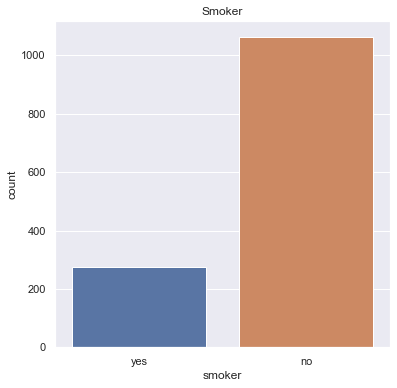

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['smoker'])
plt.title('Smoker')
plt.show()

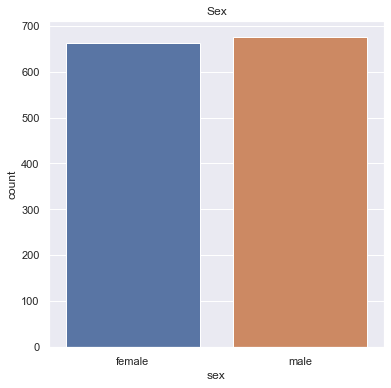

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['sex'])
plt.title('Sex')
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

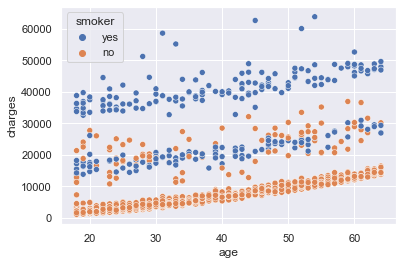

In [12]:
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'smoker')

This shows that,the charges increases with age, the older a person is, the higher their insurance. Hence, a 60 year old will pay higher insurance charges than a 20 year old. The graph also shows that, smokers generally have a higher insurance charge than non-smokers.

# Missing Values

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing figures in the data

# BOOLEAN DATA

We will have to use onehot encoding to be able to get dummy variables for the model.

In [14]:
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [15]:
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [16]:
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# MODEL

# Linear Regression

In [18]:
x = data.drop('charges', axis='columns')
y = data['charges']

In [19]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
#split the data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [22]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [23]:
#initialize the linear regression model
reg = linear_model.LinearRegression()

In [24]:
#train the model
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 8597.28489536  7231.74388195 37039.23208958  9616.21212862
 27161.15504663 11108.40935815   354.21613174 17042.35421504
   747.16617118 11372.94571472 28400.38875084  9533.99600035
  5216.48749305 38355.5614174  40201.25019476 37046.88317993
 15158.02888612 35867.31947109  9063.07424995 31650.09572393
  4122.46955807 10389.18037453  2647.70215941  6752.0935722
 11455.70143538 12576.55372408 14761.43409329  6317.33228079
  9588.04741124  2138.14714947  9375.87714427 13225.72806329
  4510.16138921  3585.45839256  4732.66994672 12637.34626748
  2260.33231947  9078.92932601 33459.16411947 32548.1168527
  4174.80105455  4490.15618578 14392.1262442  11588.95999023
  8712.67197642 12363.57345011  5437.31098673  3428.38801627
 35447.7739549   9084.07365487 15767.62103266  2302.7507234
 12500.96481021  1124.34689348 13327.47845234 12187.16682473
  3981.0147192  32336.2299135  13577.99152532 12510.93275623
 14425.49476583 10429.58572973 16603.90251205  7929.54465618
 11458.45482595  4232.50073

In [26]:
#print the actual values
print(y_test)

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64


In [27]:
reg.score(x_train,y_train)

0.7413131194887537

In [28]:
#prediction
training_data_pred = reg.predict(x_train)

In [29]:
# R Squared value
R2_train = metrics.r2_score(y_train,training_data_pred)
print('R_squared value ;',R2_train )

R_squared value ; 0.7413131194887537


In [30]:
test_data_pred = reg.predict(x_test)

In [31]:
# R Squared value
R2_test = metrics.r2_score(y_test,test_data_pred)
print('R_squared value ;',R2_test )

R_squared value ; 0.783021587162344


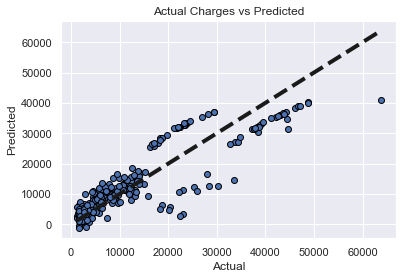

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Charges vs Predicted")
plt.show()

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# RANDOM FOREST REGRESSION

In [34]:
x = data.iloc[:, 0:6].values
print(x)
y = data.iloc[:, 6].values

[[19.    1.   27.9   0.    0.    1.  ]
 [18.    0.   33.77  1.    1.    0.  ]
 [28.    0.   33.    3.    1.    0.  ]
 ...
 [18.    1.   36.85  0.    1.    0.  ]
 [21.    1.   25.8   0.    1.    1.  ]
 [61.    1.   29.07  0.    0.    3.  ]]


In [35]:
#split the data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [36]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [39]:
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

In [40]:
y_pred = regressor.predict(x_test)
print(y_pred)

[10059.7043221   9030.7713244  45357.6049099  13035.4139695
  9548.8701625   7034.5023999   2229.74347319 11786.2026314
  7593.204       5627.374568    8631.7176359  12410.5738348
  8063.7204226   5494.7351035  21077.9843515  12441.8894298
 13437.8310184   4869.2532642   6634.572797   33517.824556
 23936.6923365  12608.0001995  18176.2248872  25019.0199466
  2486.8642835   4895.3465      3990.0673254   8017.8512384
  3874.6811891   9340.2321356   8024.5215263  48757.8915805
 13154.1890115  17286.0706203  15416.9671682   4086.8488357
  8423.7907915  46340.1861298  40055.405593    3549.6308974
  6081.7011881   3102.2230366  20430.797216   47897.0819196
 36452.9202765  18715.6312479  16691.1612456   6914.333985
  4804.0061949  19170.6013163   3629.1588376  17690.9130405
 24720.404709   46868.4699162  20392.481421    4825.9438458
  2421.769571    9916.6707457  12831.7673606  14688.7212033
  1306.6938185  46785.7288338  14982.2291786  11133.4857958
 13088.9846241   9891.579848   33028.22072

In [41]:
#print the actual values
print(y_test)

[ 9724.53      8547.6913   45702.02235  12950.0712    9644.2525
  4500.33925   2198.18985  11436.73815   7537.1639    5425.02335
  6753.038    10493.9458    7337.748     4185.0979   18310.742
 10702.6424   12523.6048    3490.5491    6457.8434   33475.81715
 23967.38305  12643.3778   23045.56616  23065.4207    1674.6323
  4667.60765   3732.6251    7682.67      3756.6216    8413.46305
  8059.6791   48970.2476   12979.358    20630.28351  14571.8908
  4137.5227    8347.1643   51194.55914  40003.33225   1880.487
  5458.04645   2867.1196   20149.3229   47496.49445  36149.4835
 26018.95052  19749.38338   6940.90985   4718.20355  22192.43711
  2899.48935  18838.70366  23568.272    46255.1125   24227.33724
  3268.84665   2322.6218    8827.2099   14478.33015  13112.6048
  1253.936    46718.16325  13919.8229    9630.397    10736.87075
  9880.068    32548.3405   38746.3551    3180.5101    8162.71625
 13041.921    11554.2236   16232.847    13887.9685   13012.20865
 13217.0945    7147.105     7731.4

In [42]:
regressor.score(x,y)

0.9764302745989842

In [43]:
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


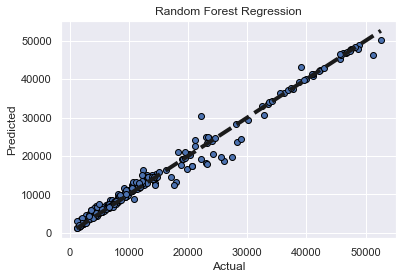

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Random Forest Regression")
plt.show()

The Random Forest Regressor gave near accurate figures, hence, it was the best performance.The Random Forest Regressor gave an R_squared of 97.6%. It means, 97.6% of the observed variation can be explained by the model's inputs.
The Linear Regression had an R_squared of 74%, which means, 74% of the observed variation can be explained by the model's inputs.